In [1]:
import pandas
from project1 import *
from multiassetoptions1 import *
from scipy.stats import norm
from roullet_example import *
from calloptionsmc import *
from exchange  import *
from basketoptions import *

# Monte Carlo Method for Roullet Simulation



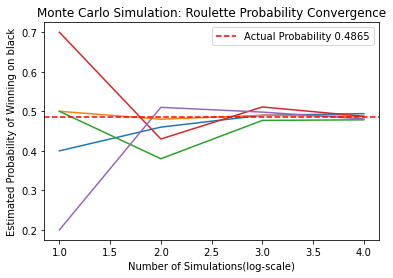

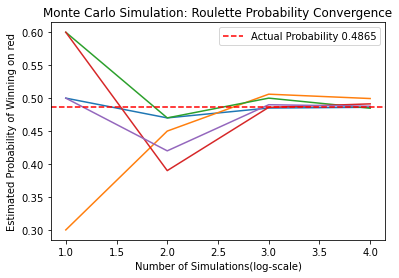

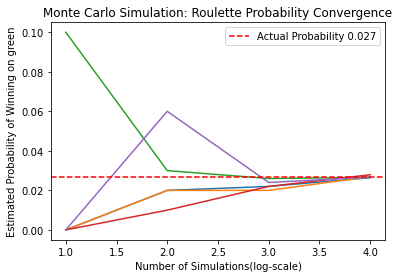

In [2]:
# Number of simulations (trials)
num_simulations = [10, 100, 1000, 10000]
# Run the Monte Carlo simulation
actual_probability = {'black':round(18/37,4), 'red': round(18/37,4), 'green': round(1/37,4)}
for color in ['black', 'red', 'green']:
    
    actual_prob = actual_probability[color]
    for i in range(5):
        win_probabilities = monte_carlo_roulette_simulation(num_simulations, color)
    # Plotting the convergence of the estimated probability
        plt.plot([1,2,3,4], win_probabilities)
    plt.axhline(y=actual_prob, color='r', linestyle='--', label=f'Actual Probability {actual_prob}')
    plt.xlabel('Number of Simulations(log-scale)')
    plt.ylabel(f'Estimated Probability of Winning on {color}')
    plt.legend()
    plt.title('Monte Carlo Simulation: Roulette Probability Convergence')
    plt.savefig(f"{color}_roullet.png", dpi=400)
    plt.show(block = True)
    

# Single Asset Options Pricing

In [3]:

# Option parameters
spot_price = 100   # Current price of the underlying asset (e.g., stock)
strike_price = 105  # Option's strike price
time_to_expiration = 0.5  # 6 months to expiration
risk_free_rate = 0.05   # 5% annualized risk-free rate
volatility = 0.2       # 20% annualized volatility

# Benchmark value using Black-Scholes analytical formula
benchmark_option_price = black_scholes_call(spot_price, strike_price,
                                            time_to_expiration,
                                            risk_free_rate, volatility)




Error analysis for Monte Carlo method:
Simulations = 10: Option Price = 5.612811216983832, Absolute Error = 1.0311310494438244
Simulations = 100: Option Price = 4.179241330530075, Absolute Error = 0.40243883700993255
Simulations = 1000: Option Price = 4.320592919182171, Absolute Error = 0.26108724835783637
Simulations = 10000: Option Price = 4.46333678663548, Absolute Error = 0.1183433809045269
Simulations = 10: Option Price = 1.5444715653378798, Absolute Error = 3.0372086022021274
Simulations = 100: Option Price = 4.643088506360619, Absolute Error = 0.061408338820611696
Simulations = 1000: Option Price = 5.137247295495818, Absolute Error = 0.5555671279558112
Simulations = 10000: Option Price = 4.633902671766976, Absolute Error = 0.05222250422696906
Simulations = 10: Option Price = 10.312004622799561, Absolute Error = 5.730324455259554
Simulations = 100: Option Price = 3.4382299279858604, Absolute Error = 1.1434502395541468
Simulations = 1000: Option Price = 4.99345203545267, Absolute

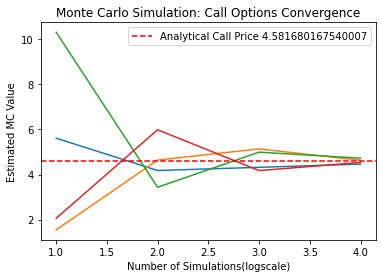

In [4]:



"""---"""
# for i in [10, 20, 40, 15]:
#     np.random.seed(i)
#     x = []
#     computation_time[i] = dict()
#     for num_simulations in num_simulations_values:
#         start = datetime.datetime.now()
#         option_price_mc = monte_carlo_call_option_price(spot_price, strike_price, time_to_expiration, risk_free_rate, volatility, num_simulations)
#         x.append(option_price_mc)
#         absolute_error_mc = abs(option_price_mc - benchmark_option_price)
#         print(f"Simulations = {num_simulations}: Option Price = {option_price_mc}, Absolute Error = {absolute_error_mc}")
#         computation_time[i][num_simulations] = datetime.datetime.now()-start
#     plt.plot([1,2,3,4,5], x)
# plt.axhline(y=benchmark_option_price, color='r', linestyle='--', label=f'Analytical Call Price {benchmark_option_price}')
# plt.xlabel('Number of Simulations(10^x)')
# plt.ylabel(f'Estimated MC Value')
# plt.legend()
# plt.title('Monte Carlo Simulation: Call Options Convergence')
# plt.show(block = True)


"""------------------------------- num_simulations----------------------------------"""
num_simulations_values = [10, 100, 1000, 10000] # Different numbers of simulations
num_steps_values = [10,100,1000]
computation_time = dict()
print("\nError analysis for Monte Carlo method:")
for i in [10, 20, 40, 15]:
    np.random.seed(i)
    x = []
    computation_time[i] = dict()
    for num_simulations in num_simulations_values:
        start = datetime.datetime.now()
        option_price_mc = monte_carlo_call_option_price(spot_price, strike_price, time_to_expiration, risk_free_rate, volatility, num_simulations)
        x.append(option_price_mc)
        absolute_error_mc = abs(option_price_mc - benchmark_option_price)
        print(f"Simulations = {num_simulations}: Option Price = {option_price_mc}, Absolute Error = {absolute_error_mc}")
        computation_time[i][num_simulations] = datetime.datetime.now()-start
    plt.plot([1,2,3,4], x)
plt.axhline(y=benchmark_option_price, color='r', linestyle='--', label=f'Analytical Call Price {benchmark_option_price}')
plt.xlabel('Number of Simulations(logscale)')
plt.ylabel(f'Estimated MC Value')
plt.legend()
plt.title('Monte Carlo Simulation: Call Options Convergence')
plt.savefig("calloptions.png", dpi=400)
plt.show(block = True)




Convergence with Time steps


Error analysis for Monte Carlo method:
Simulations = 1: Option Price = 4.727388015506437, Absolute Error = 0.14570784796643022
Simulations = 10: Option Price = 3.388045810606305, Absolute Error = 1.193634356933702
Simulations = 100: Option Price = 5.3885741956048445, Absolute Error = 0.8068940280648373
Simulations = 1000: Option Price = 3.1267671013938925, Absolute Error = 1.4549130661461147
Simulations = 10000: Option Price = 4.499099960310631, Absolute Error = 0.08258020722937598
Simulations = 1: Option Price = 4.603105894643321, Absolute Error = 0.02142572710331425
Simulations = 10: Option Price = 4.141324276745873, Absolute Error = 0.44035589079413384
Simulations = 100: Option Price = 5.678170409946642, Absolute Error = 1.0964902424066345
Simulations = 1000: Option Price = 6.1592470436244895, Absolute Error = 1.5775668760844823
Simulations = 10000: Option Price = 5.424551192282972, Absolute Error = 0.8428710247429647
Simulations = 1: Option Price = 4.163516637645212, Absolute Erro

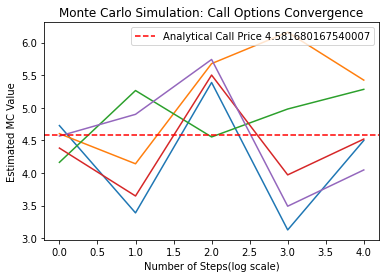

,10,20,40,15,30
1,0.007343,0.000000,0.000000,0.000000,0.000000
10,0.015893,0.016724,0.015772,0.022659,0.015687
100,0.132948,0.141875,0.138373,0.134936,0.142037
1000,1.371544,1.347533,1.351446,1.327036,1.340858
10000,13.400248,13.522537,13.400570,13.516976,13.133138


In [5]:
# num_simulations_values = [10, 100, 1000, 10000, 100000] # Different numbers of simulations
num_simulation = 100
num_steps_values = [1, 10,100,1000,10000]
computation_time = dict()
print("\nError analysis for Monte Carlo method:")
for i in [10, 20, 40, 15,30]:
    np.random.seed(i)
    x = []
    computation_time[i] = dict()
    for num_steps in num_steps_values:
        start = datetime.datetime.now()
        option_price_mc = monte_carlo_call_option_price(spot_price, strike_price, time_to_expiration, risk_free_rate, volatility, num_simulation, num_steps)
        x.append(option_price_mc)
        absolute_error_mc = abs(option_price_mc - benchmark_option_price)
        print(f"Simulations = {num_steps}: Option Price = {option_price_mc}, Absolute Error = {absolute_error_mc}")
        computation_time[i][num_steps] = (datetime.datetime.now()-start).total_seconds()
    plt.plot([0,1,2,3,4], x)
plt.axhline(y=benchmark_option_price, color='r', linestyle='--', label=f'Analytical Call Price {benchmark_option_price}')
plt.xlabel('Number of Steps(log scale)')
plt.ylabel(f'Estimated MC Value')
plt.legend()
plt.title('Monte Carlo Simulation: Call Options Convergence')
plt.savefig("MC_methodDiscretetimesteps.png", dpi=400)
plt.show(block = True)

pd.DataFrame(computation_time)

Convergence with Number of Simulations

Simulations = 10: Option Price = 5.612811216983832, Absolute Error = 1.0311310494438244
Simulations = 100: Option Price = 4.179241330530075, Absolute Error = 0.40243883700993255
Simulations = 1000: Option Price = 4.320592919182171, Absolute Error = 0.26108724835783637
Simulations = 10000: Option Price = 4.46333678663548, Absolute Error = 0.1183433809045269
Simulations = 10: Option Price = 1.5444715653378798, Absolute Error = 3.0372086022021274
Simulations = 100: Option Price = 4.643088506360619, Absolute Error = 0.061408338820611696
Simulations = 1000: Option Price = 5.137247295495818, Absolute Error = 0.5555671279558112
Simulations = 10000: Option Price = 4.633902671766976, Absolute Error = 0.05222250422696906
Simulations = 10: Option Price = 10.312004622799561, Absolute Error = 5.730324455259554
Simulations = 100: Option Price = 3.4382299279858604, Absolute Error = 1.1434502395541468
Simulations = 1000: Option Price = 4.99345203545267, Absolute Error = 0.4117718679126625
Simulations 

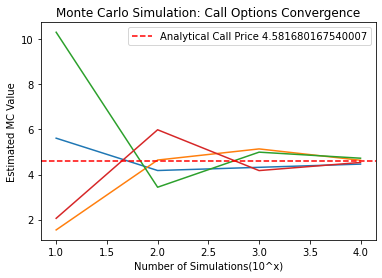

,10,20,40,15,30
10,0.013273,0.024545,0.033603,0.035553,0.015687
100,0.254727,0.256908,0.244593,0.250535,0.142037
1000,2.495230,2.637633,2.471822,2.387189,1.340858
10000,25.011210,24.782255,24.619362,24.730523,13.133138
1,NaN,NaN,NaN,NaN,0.000000


In [6]:
for i in [10, 20, 40, 15]:
    np.random.seed(i)
    x = []
    computation_time[i] = dict()
    for num_simulations in num_simulations_values:
        start = datetime.datetime.now()
        option_price_mc = monte_carlo_call_option_price(spot_price, strike_price, time_to_expiration, risk_free_rate, volatility, num_simulations)
        x.append(option_price_mc)
        absolute_error_mc = abs(option_price_mc - benchmark_option_price)
        print(f"Simulations = {num_simulations}: Option Price = {option_price_mc}, Absolute Error = {absolute_error_mc}")
        computation_time[i][num_simulations] = (datetime.datetime.now()-start).total_seconds()
    plt.plot([1,2,3,4], x)
plt.axhline(y=benchmark_option_price, color='r', linestyle='--', label=f'Analytical Call Price {benchmark_option_price}')
plt.xlabel('Number of Simulations(10^x)')
plt.ylabel(f'Estimated MC Value')
plt.legend()
plt.title('Monte Carlo Simulation: Call Options Convergence')
plt.savefig("MCmethodNumberofSimulation.png", dpi=400)
plt.show(block = True)

pd.DataFrame(computation_time)

In [7]:
pd.DataFrame(computation_time)

,10,20,40,15,30
10,0.013273,0.024545,0.033603,0.035553,0.015687
100,0.254727,0.256908,0.244593,0.250535,0.142037
1000,2.495230,2.637633,2.471822,2.387189,1.340858
10000,25.011210,24.782255,24.619362,24.730523,13.133138
1,NaN,NaN,NaN,NaN,0.000000


In [8]:
import pandas as pd
pd.DataFrame(computation_time)

,10,20,40,15,30
10,0.013273,0.024545,0.033603,0.035553,0.015687
100,0.254727,0.256908,0.244593,0.250535,0.142037
1000,2.495230,2.637633,2.471822,2.387189,1.340858
10000,25.011210,24.782255,24.619362,24.730523,13.133138
1,NaN,NaN,NaN,NaN,0.000000


# Exchange Option

In [9]:

# default n_simulation = 100000
data = {
    'S1': [100, 95, 98, 97, 96],
    'S2': [205, 108, 104, 107, 106],
    'T': [1, 1.2, 1.1, 1.3, 1.4],
    'r': [0.045, 0.05, 0.048, 0.047, 0.049],
    'div1': [0.03, 0.035, 0.032, 0.038, 0.04],
    'div2': [0.04, 0.045, 0.042, 0.041, 0.043],
    'sigma1': [0.2, 0.22, 0.21, 0.23, 0.24],
    'sigma2': [0.18, 0.17, 0.19, 0.18, 0.2],
    'rho': [0.5, 0.52, 0.53, 0.51, 0.54],
    'Q1': [2.9, 0.88, 0.91, 0.87, 0.89],
    'Q2': [1.1, 1.12, 1.09, 1.13, 1.11]
}
data  = pd.DataFrame(data)
data
data1 = data.drop('r', axis=1)
data
data["ExPrcMC"]=data.apply(lambda x :exchange_option_mc(*x.to_list()),axis=1)
data["ExPrcMgb"]=data1.apply(lambda x :margrabe_option(*x.to_list()),axis=1)               
# exchange_option_MC = exchange_option_mc(*args)
# exchange_option_Mgb = margrabe_option(S1_0, S2_0, T, q1, q2, sigma1, sigma2, rho, Q1, Q2)
# print(exchange_option_Mgb)
# print(exchange_option_MC)
data

,S1,S2,T,r,div1,div2,sigma1,sigma2,rho,Q1,Q2,ExPrcMC,ExPrcMgb
0,100,205,1.0,0.045,0.030,0.040,0.20,0.18,0.50,2.90,1.10,66.543200,66.606316
1,95,108,1.2,0.050,0.035,0.045,0.22,0.17,0.52,0.88,1.12,0.407321,0.407902
2,98,104,1.1,0.048,0.032,0.042,0.21,0.19,0.53,0.91,1.09,1.281929,1.292901
3,97,107,1.3,0.047,0.038,0.041,0.23,0.18,0.51,0.87,1.13,0.655393,0.657297
4,96,106,1.4,0.049,0.040,0.043,0.24,0.20,0.54,0.89,1.11,1.201906,1.210705


In [10]:
data['%Deviation'] = data.apply(lambda x: str(round((x.ExPrcMC/x.ExPrcMgb-1)*100,2))+'%', axis=1)
# data["ExchangePriceMC"]=data.apply(lambda x :exchange_option_mc(*x.to_list()),axis=1)
# data["ExchangePriceMgb"]=data1.apply(lambda x :margrabe_option(*x.to_list()),axis=1)  
data

,S1,S2,T,r,div1,div2,sigma1,sigma2,rho,Q1,Q2,ExPrcMC,ExPrcMgb,%Deviation
0,100,205,1.0,0.045,0.030,0.040,0.20,0.18,0.50,2.90,1.10,66.543200,66.606316,-0.09%
1,95,108,1.2,0.050,0.035,0.045,0.22,0.17,0.52,0.88,1.12,0.407321,0.407902,-0.14%
2,98,104,1.1,0.048,0.032,0.042,0.21,0.19,0.53,0.91,1.09,1.281929,1.292901,-0.85%
3,97,107,1.3,0.047,0.038,0.041,0.23,0.18,0.51,0.87,1.13,0.655393,0.657297,-0.29%
4,96,106,1.4,0.049,0.040,0.043,0.24,0.20,0.54,0.89,1.11,1.201906,1.210705,-0.73%


In [11]:
args = [400, 200, 1, 0.05, 0, 0, 0.4, 0.6, 0.5, 0.5, 1]
S1_0, S2_0, T, r, q1, q2, sigma1, sigma2, rho, Q1, Q2 = args
N_values = [10, 100, 1000, 10000]
df_results = simulate_multiple_times(N_values, args)
df_results['Standard Error'] = df_results['Std Dev Option Price'] / np.sqrt(100)

# Compute 95% confidence intervals
z = stats.norm.ppf(0.975)  # z-value for 95% CI
df_results['CI Lower'] = df_results['Mean Option Price'] - z * df_results['Standard Error']
df_results['CI Upper'] = df_results['Mean Option Price'] + z * df_results['Standard Error']
analytical_solution = margrabe_option(400, 200, 1, 0, 0, 0.4, 0.6, 0.5, 0.5, 1)
df_results["% Deviation"] = df_results["Mean Option Price"].apply(lambda x: (x-analytical_solution)/analytical_solution*100)
df_results

[400, 200, 1, 0.05, 0, 0, 0.4, 0.6, 0.5, 0.5, 1]


,N,Mean Option Price,Std Dev Option Price,Standard Error,CI Lower,CI Upper,% Deviation
0,10,42.419219,20.357730,2.035773,38.429177,46.409261,1.645176
1,100,41.390815,6.082936,0.608294,40.198581,42.583048,-0.819093
2,1000,41.591599,1.786846,0.178685,41.241384,41.941814,-0.337973
3,10000,41.722228,0.543900,0.054390,41.615625,41.828830,-0.024959


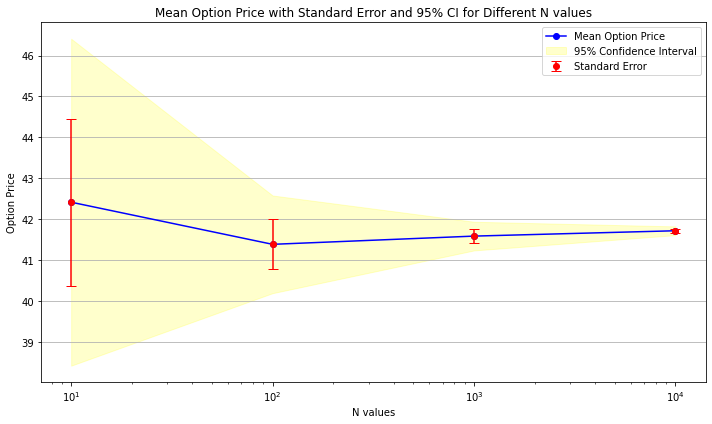

In [12]:
# Plot
plt.figure(figsize=(10, 6))

# Plotting the line
plt.plot(df_results['N'], df_results['Mean Option Price'], '-o', color='blue', label='Mean Option Price')

# Adding the error bars (standard error candles)
plt.errorbar(df_results['N'], df_results['Mean Option Price'], yerr=df_results['Standard Error'], fmt='o', color='red', ecolor='red', capsize=5, label='Standard Error')

# Adding the 95% confidence intervals
plt.fill_between(df_results['N'], df_results['CI Lower'], df_results['CI Upper'], color='yellow', alpha=0.2, label='95% Confidence Interval')

plt.xscale('log')  # Using a logarithmic x-axis to better distinguish the different N values
plt.xlabel('N values')
plt.ylabel('Option Price')
plt.title('Mean Option Price with Standard Error and 95% CI for Different N values')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("ExchangeOptionresults.png", dpi=400)
plt.show()

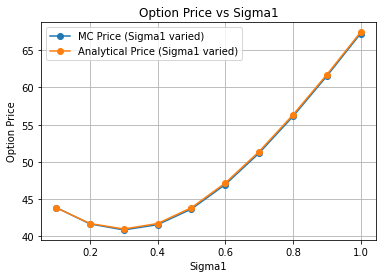

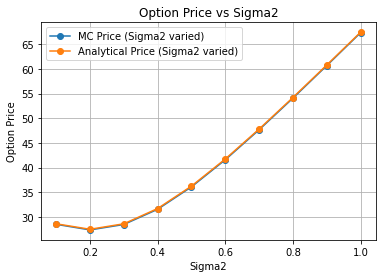

In [13]:
sigmas =np.linspace(0.1, 1, 10)
mc_prices_sigma1 = []
analytical_prices_sigma1 = []
mc_prices_sigma2 = []
analytical_prices_sigma2 = []
for sigma in sigmas:
    monte_carlo_price = exchange_option_mc(S1_0, S2_0, T, r, q1, q2, sigma, sigma2, rho, Q1, Q2)
    analytical_price = margrabe_option(S1_0, S2_0, T, q1, q2, sigma, sigma2, rho, Q1, Q2)
    mc_prices_sigma1.append(monte_carlo_price)
    analytical_prices_sigma1.append(analytical_price)

for sigma in sigmas:
    monte_carlo_price = exchange_option_mc(S1_0, S2_0, T, r, q1, q2, sigma1, sigma, rho, Q1, Q2)
    analytical_price = margrabe_option(S1_0, S2_0, T, q1, q2, sigma1, sigma, rho, Q1, Q2)
    mc_prices_sigma2.append(monte_carlo_price)
    analytical_prices_sigma2.append(analytical_price)
plt.figure()
plt.plot(sigmas, mc_prices_sigma1, '-o', label='MC Price (Sigma1 varied)')
plt.plot(sigmas, analytical_prices_sigma1, '-o', label='Analytical Price (Sigma1 varied)')
plt.xlabel('Sigma1')
plt.ylabel('Option Price')
plt.legend()
plt.title('Option Price vs Sigma1')
plt.grid(True)

plt.savefig("RobustcheckSigma1.png", dpi=400)
plt.show()
plt.figure()
plt.plot(sigmas, mc_prices_sigma2, '-o', label='MC Price (Sigma2 varied)')
plt.plot(sigmas, analytical_prices_sigma2, '-o', label='Analytical Price (Sigma2 varied)')
plt.xlabel('Sigma2')
plt.ylabel('Option Price')
plt.legend()
plt.title('Option Price vs Sigma2')
plt.grid(True)

plt.savefig("RobustcheckSigma2.png", dpi=400)
plt.show()

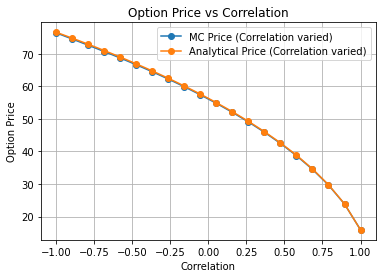

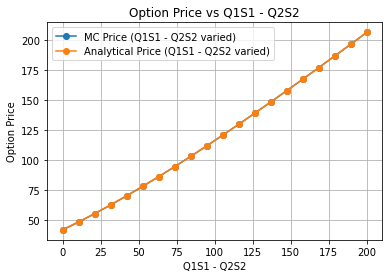

In [14]:
correlations = np.linspace(-1, 1, 20)  # Range of correlations from -1 to 1
mc_prices_correlation = []
analytical_prices_correlation = []
for current_rho in correlations:
    monte_carlo_price = exchange_option_mc(S1_0, S2_0, T, r, q1, q2, sigma1, sigma2, current_rho, Q1, Q2)
    analytical_price = margrabe_option(S1_0, S2_0, T, q1, q2, sigma1, sigma2, current_rho, Q1, Q2)
    mc_prices_correlation.append(monte_carlo_price)
    analytical_prices_correlation.append(analytical_price)

plt.figure()
plt.plot(correlations, mc_prices_correlation, '-o', label='MC Price (Correlation varied)')
plt.plot(correlations, analytical_prices_correlation, '-o', label='Analytical Price (Correlation varied)')
plt.xlabel('Correlation')
plt.ylabel('Option Price')
plt.legend()
plt.title('Option Price vs Correlation')
plt.grid(True)

plt.savefig("RobustcheckCorrelation.png", dpi=400)
plt.show()
S1_values = np.linspace(S2_0*Q2/Q1, 2*S2_0*Q2/Q1, 20)  # Example range, adjust as needed
differences = []
mc_prices_difference = []
analytical_prices_difference = []

for current_S1 in S1_values:
    difference = Q1 * current_S1 - Q2 * S2_0
    monte_carlo_price = exchange_option_mc(current_S1, S2_0, T, r, q1, q2, sigma1, sigma2, rho, Q1, Q2)
    analytical_price = margrabe_option(current_S1, S2_0, T, q1, q2, sigma1, sigma2, rho, Q1, Q2)
    differences.append(difference)
    mc_prices_difference.append(monte_carlo_price)
    analytical_prices_difference.append(analytical_price)

plt.figure()
plt.plot(differences, mc_prices_difference, '-o', label='MC Price (Q1S1 - Q2S2 varied)')
plt.plot(differences, analytical_prices_difference, '-o', label='Analytical Price (Q1S1 - Q2S2 varied)')
plt.xlabel('Q1S1 - Q2S2')
plt.ylabel('Option Price')
plt.legend()
plt.title('Option Price vs Q1S1 - Q2S2')
plt.grid(True)

plt.savefig("RobustcheckOffset.png", dpi=400)
plt.show()

# Basket Option

In [16]:
from basketoptions import *

In [17]:
S0 = [105, 108, 98, 103]
T = 1
r = 0.05
q = [0.02, 0.04, 0.03, 0.06]
sigma = [0.2, 0.25, 0.15, 0.22]
rho_matrix = np.array([[1, 0.75, 0.60, 0.50], 
                      [0.75, 1, 0.68, 0.55], 
                      [0.60, 0.68, 1, 0.58], 
                      [0.50, 0.55, 0.58, 1]])
weights = [0.25,0.2,0.15,0.4]
K = 100
params = (S0, T, r, q, sigma, rho_matrix, K, weights)


In [18]:
# n_simulation = 100000 default value in the function basket_option_mc
MC_basket_options = basket_option_mc(S0, T, r, q, sigma, rho_matrix, K,weights)
MC_basket_options
params

([105, 108, 98, 103],
 1,
 0.05,
 [0.02, 0.04, 0.03, 0.06],
 [0.2, 0.25, 0.15, 0.22],
 array([[1.  , 0.75, 0.6 , 0.5 ],
        [0.75, 1.  , 0.68, 0.55],
        [0.6 , 0.68, 1.  , 0.58],
        [0.5 , 0.55, 0.58, 1.  ]]),
 100,
 [0.25, 0.2, 0.15, 0.4])

In [19]:
N_values = [10,100,1000, 10000]
df_results = simulate_multiple_times_basket(N_values, params)
df_results['Standard Error'] = df_results['Std Dev Option Price'] / np.sqrt(100)

# Compute 95% confidence intervals
z = stats.norm.ppf(0.975)  # z-value for 95% CI
df_results['CI Lower'] = df_results['Mean Option Price'] - z * df_results['Standard Error']
df_results['CI Upper'] = df_results['Mean Option Price'] + z * df_results['Standard Error']
df_results


,N,Mean Option Price,Std Dev Option Price,Standard Error,CI Lower,CI Upper
0,10,9.504244,4.220857,0.422086,8.676971,10.331517
1,100,9.938501,1.528085,0.152808,9.639002,10.238000
2,1000,9.775374,0.440814,0.044081,9.688976,9.861772
3,10000,9.790819,0.142271,0.014227,9.762935,9.818704


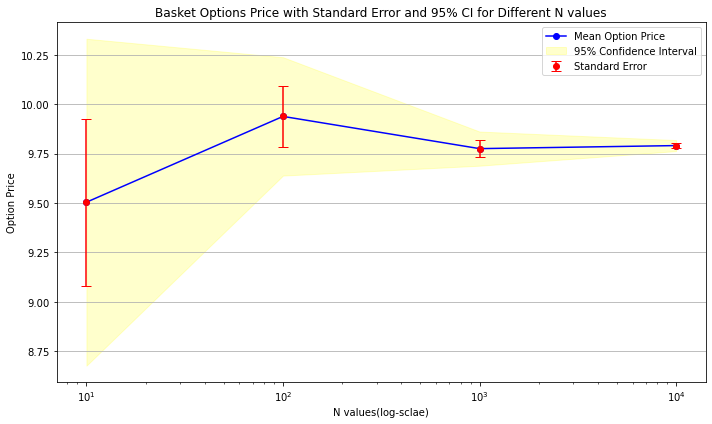

In [20]:
# Plot
plt.figure(figsize=(10, 6))

# Plotting the line
plt.plot(df_results['N'], df_results['Mean Option Price'], '-o', color='blue', label='Mean Option Price')

# Adding the error bars (standard error candles)
plt.errorbar(df_results['N'], df_results['Mean Option Price'], yerr=df_results['Standard Error'], fmt='o', color='red', ecolor='red', capsize=5, label='Standard Error')

# Adding the 95% confidence intervals
plt.fill_between(df_results['N'], df_results['CI Lower'], df_results['CI Upper'], color='yellow', alpha=0.2, label='95% Confidence Interval')

plt.xscale('log')  # Using a logarithmic x-axis to better distinguish the different N values
plt.xlabel('N values(log-sclae)')
plt.ylabel('Option Price')
plt.title('Basket Options Price with Standard Error and 95% CI for Different N values')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.savefig("BasketOptionResult.png", dpi=400)
plt.show()

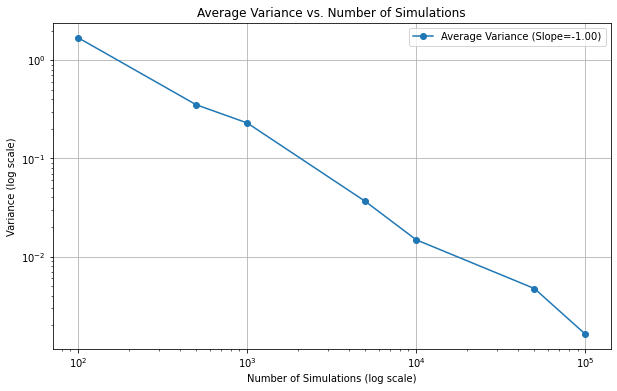

In [21]:
simulation_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
variances = []


from scipy.stats import linregress

simulation_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
all_variances = []
all_estimates = []

# Repeat the entire process multiple times
for i in range(10):
    variances = []

    for N in simulation_sizes:
        MC_estimates = [basket_option_mc(*params, n_simulations=N) for n in range(10)]

        var = np.var(MC_estimates)
        variances.append(var)

    all_variances.append(variances)

# Average the variances
avg_variances = np.mean(all_variances, axis=0)

# Fit a line to the log-log data
slope, _, _, _, _ = linregress(np.log(simulation_sizes), np.log(avg_variances))

plt.figure(figsize=(10, 6))
plt.loglog(simulation_sizes, avg_variances, 'o-', label=f"Average Variance (Slope={slope:.2f})")
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Variance (log scale)')
plt.title('Average Variance vs. Number of Simulations')
plt.grid(True)
plt.legend()

plt.savefig("convergencerootN.png", dpi=400)
plt.show()
# plt.savefig("calloptions.png", dpi=300)

# Antithetic Variables

In [23]:
S0 = [105, 108, 98, 103]
T = 1
r = 0.05
q = [0.02, 0.04, 0.03, 0.06]
sigma = [0.2, 0.25, 0.15, 0.22]
rho_matrix = np.array([[1, 0.75, 0.60, 0.50], 
                      [0.75, 1, 0.68, 0.55], 
                      [0.60, 0.68, 1, 0.58], 
                      [0.50, 0.55, 0.58, 1]])
weights = [0.25,0.2,0.15,0.4]
K = 100
params = (S0, T, r, q, sigma, rho_matrix, K, weights)
mc_errors = []
mc_av_errors = []
Ns = [100, 500, 1000, 5000, 10000, 50000, 100000]
for N in simulation_sizes:
    mc_std_error, mc_antithetic_std_error = compute_std_errors(S0, T, r,  q,sigma, rho_matrix, K, weights, n_simulations=N, repetitions=100)
    mc_errors.append(mc_std_error)
    mc_av_errors.append(mc_antithetic_std_error)
comparison_results = pd.DataFrame({
    'Ns': Ns,
    'mc_errors': mc_errors,
    'mc_av_errors': mc_av_errors
})
comparison_results['%fraction'] = comparison_results['mc_av_errors']/comparison_results['mc_errors']
comparison_results


,Ns,mc_errors,mc_av_errors,%fraction
0,100,0.149145,0.103728,0.695484
1,500,0.059407,0.040599,0.683402
2,1000,0.042725,0.031972,0.748324
3,5000,0.020104,0.013615,0.677207
4,10000,0.014950,0.008660,0.579288
5,50000,0.006548,0.004437,0.677626
6,100000,0.004560,0.002683,0.588410


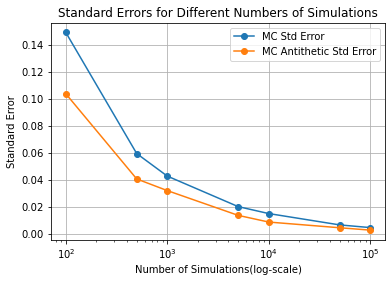

In [24]:
plt.plot(Ns, mc_errors, '-o', label='MC Std Error')
plt.plot(Ns, mc_av_errors, '-o', label='MC Antithetic Std Error')
plt.xscale('log')
plt.xlabel('Number of Simulations(log-scale)')
plt.ylabel('Standard Error')
plt.legend()
plt.grid(True)
plt.title('Standard Errors for Different Numbers of Simulations')
plt.savefig('MC_av.png',dpi=400)
plt.show()

# Control variate

In [25]:
from MC_controlvariate import *

In [26]:
S0 = [105, 108, 98, 103]
T = 1
r = 0.05
q = [0.02, 0.04, 0.03, 0.06]
sigma = [0.2, 0.25, 0.15, 0.22]
rho_matrix = np.array([[1, 0.75, 0.60, 0.50], 
                      [0.75, 1, 0.68, 0.55], 
                      [0.60, 0.68, 1, 0.58], 
                      [0.50, 0.55, 0.58, 1]])
weights = [0.25,0.2,0.15,0.4]
K = 100

mc_errors = []
mc_cv_errors = []
Ns = [10,100,1000, 10000]
for N in Ns:
    mc_std_error, mc_cv_std_error = compute_std_errors(S0, T, r,  q,sigma, rho_matrix, K, weights, n_simulations=N, repetitions=100)
    mc_errors.append(mc_std_error)
    mc_cv_errors.append(mc_cv_std_error)
comparison_results = pd.DataFrame({
    'Ns': Ns,
    'mc_errors': mc_errors,
    'mc_av_errors': mc_cv_errors
})


In [29]:
comparison_results

,Ns,mc_errors,mc_av_errors
0,10,0.456946,0.049484
1,100,0.143729,0.001788
2,1000,0.038607,0.001402
3,10000,0.012411,0.001335
